─────────────────────────────────────────────────── RUN CONFIG ────────────────────────────────────────────────────

Ticker: TSLA
Interval: 1m
Delay (s): 1.0


───────────────────────────────────────────────────── REQUEST ─────────────────────────────────────────────────────

CALL 1: yf.Ticker('TSLA').history(period='7d', interval='1m', auto_adjust=False)


───────────────────────────────────────────────────── RESULT ──────────────────────────────────────────────────────

SUCCESS: Downloaded 2569 rows for TSLA at interval '1m'.
CSV saved to: /Users/kristopherpepper/Documents/jupyterProjects/historicalStockDataDownload/downloads/TSLA_1m_max_20260224_201849.csv


──────────────────────────────────────────────────── CALL LOG ─────────────────────────────────────────────────────

Calls made:
1. {'timestamp': '2026-02-24T20:18:47', 'method': 'yf.Ticker().history', 'ticker': 'TSLA', 'time_frame': '7d', 'delay_seconds': 1.0, 'status': 'success', 'rows': 2569, 'interval': '1m', 'csv_path': 'downloads/TSLA_1m_max_20260224_201849.csv'}


─────────────────────────────────────────────────── OUTPUT FILE ───────────────────────────────────────────────────

Max-available file (1m): downloads/TSLA_1m_max_20260224_201849.csv


────────────────────────────────────────────────────── CHART ──────────────────────────────────────────────────────

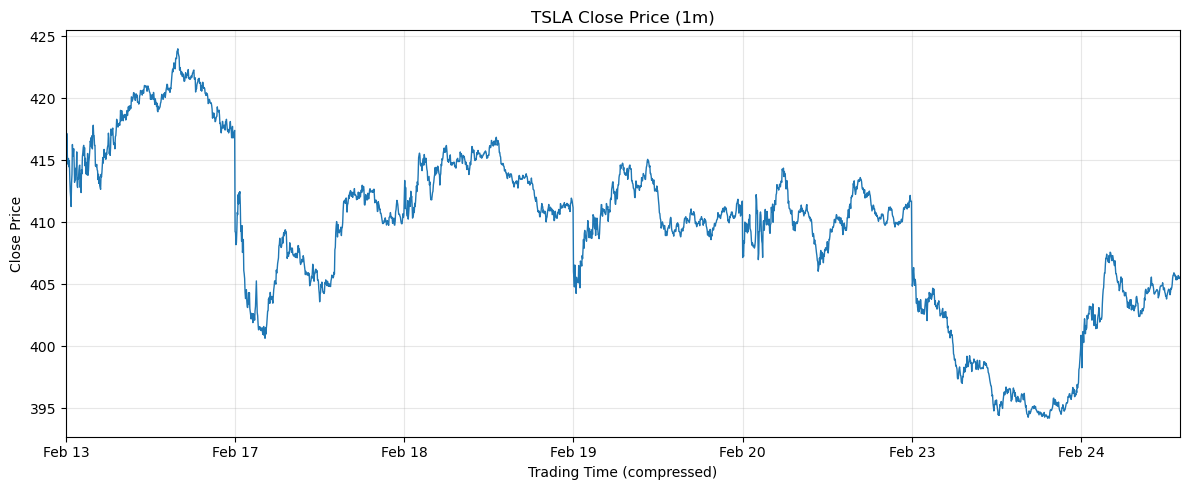

In [10]:
import importlib

from constants import TARGET_TICKER, INTERVAL, CALL_DELAY_SECONDS
from utils.print_header import print_header

print_calls_module = importlib.import_module("utils.print_calls_made")
max_data_module = importlib.import_module("utils.get_max_available_share_price_data")
chart_module = importlib.import_module("utils.plot_compressed_trading_chart")
importlib.reload(print_calls_module)
importlib.reload(max_data_module)
importlib.reload(chart_module)

print_header("RUN CONFIG")
print(f"Ticker: {TARGET_TICKER}")
print(f"Interval: {INTERVAL}")
print(f"Delay (s): {CALL_DELAY_SECONDS}")

csv_path, calls = max_data_module.get_max_available_share_price_data(
    target_ticker=TARGET_TICKER,
    interval=INTERVAL,
    delay_seconds=CALL_DELAY_SECONDS,
)

print_header("OUTPUT FILE")
print(f"Max-available file ({INTERVAL}): {csv_path}")

print_header("CHART")
chart_module.plot_compressed_trading_chart(
    csv_path=str(csv_path),
    ticker=TARGET_TICKER,
    interval=INTERVAL,
)